In [203]:
#  Import and read the data.csv.
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [232]:
# read from csv file with second row being the header
orig_df = pd.read_csv("./Resources/project_data-culture-gdp.csv", header = 1)
orig_df.sample(5)

,Domain,Subdomain,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,NaN,Natural Heritage,"$859,045","$1,686,295","$1,371,304","$1,297,885","$1,057,873","$588,300","$734,812","$920,693","$832,980","$467,425"
8,NaN,Photography,"$16,202,543","$20,069,922","$23,190,041","$23,375,298","$28,934,957","$31,576,621","$30,472,000","$24,828,459","$30,677,166","$34,083,718"
5,NaN,Festivals and Celebrations,"$9,203,125","$5,935,096","$8,779,232","$11,800,992","$11,674,413","$6,346,028","$13,107,726","$13,900,317","$10,099,251","$11,376,622"
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,Periodicals,"$28,380,643","$29,258,481","$31,674,498","$31,062,392","$25,841,799","$33,370,465","$35,153,857","$39,343,127","$39,588,665","$28,440,821"


In [205]:
# remove sub total and total rows from the table
orig_df.drop(orig_df.index[orig_df['Subdomain'] == 'Culture Products'], inplace=True)
orig_df.drop(orig_df.index[orig_df['Subdomain'] == 'Sport Products'], inplace=True)
orig_df.drop(orig_df.index[orig_df['Domain'] == 'Total'], inplace=True)
orig_df.reset_index(drop=True, inplace=True)
orig_df.sample(5)

,Domain,Subdomain,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9,NaN,Crafts,"$4,958,257","$5,278,975","$4,923,828","$4,557,574","$4,817,470","$5,541,674","$6,360,862","$6,737,529","$6,416,449","$6,799,085"
27,Sub Total,Non-Culture Products,"$431,182,516","$482,681,467","$515,883,737","$527,941,174","$624,091,470","$573,398,860","$633,584,548","$606,889,020","$662,082,561","$657,413,117"
18,NaN,Multi Subdomain,"$81,588,178","$76,936,847","$93,389,993","$80,389,906","$78,879,488","$79,704,569","$87,619,303","$90,773,084","$89,741,202","$87,893,922"
32,Sub Total,Non-Sport Products,"$67,011,553","$54,639,974","$52,097,551","$55,855,514","$76,795,059","$65,398,336","$87,673,119","$76,522,559","$86,758,837","$79,335,501"
0,Heritage and Libraries,Archives,"$623,333","$767,925","$956,982","$1,322,387","$1,509,624","$1,845,579","$1,516,465","$1,936,258","$1,844,916","$65,487"


In [206]:
# orig_df.dtypes

In [207]:
# seperate Domain and Subdomain columns from the rest
df2 = pd.concat([orig_df.pop(x) for x in ['Domain', 'Subdomain']], axis=1)
df2.head(5)

,Domain,Subdomain
0,Heritage and Libraries,Archives
1,NaN,Libraries
2,NaN,Culture Heritage
3,NaN,Natural Heritage
4,Live Performance,Performing Arts


In [208]:
# set the following 3 rows of domain to sport to distingish from the Culture education
for indx in range (len(df2)):
    if (df2['Domain'][indx] == 'Sport'):
        df2['Domain'][indx+1] = 'Sport'
        if (df2['Subdomain'][indx] == 'Education and Training'):
            df2['Subdomain'][indx] = 'Sport Education and Training'
        elif (df2['Subdomain'][indx] == 'Governance, Funding and Professional Support'):
            df2['Subdomain'][indx] ='Sport Governance, Funding and Professional Support'

df2.head(5)

,Domain,Subdomain
0,Heritage and Libraries,Archives
1,NaN,Libraries
2,NaN,Culture Heritage
3,NaN,Natural Heritage
4,Live Performance,Performing Arts


In [209]:
# print(temp_domain)
# temp_domain.loc[str_list,'Domain'] = "Heritage and Libraries"
# mask = dfd['a'].str.startswith('o')
temp_domain = df2
# Defining all the conditions inside a function
def condition(x):
    if (x== 'Archives') or (x=='Libraries') or (x=='Culture Heritage') or (x=='Natural Heritage'):
        return "Heritage and Libraries"
    elif (x=='Performing Arts') | (x=='Festivals and Celebrations'):
        return "Live Performance"
    elif (x == 'Original Visual Art') | (x == 'Art Reproductions') | (x =='Crafts')  | (x == 'Photography') |(x =='Advertising') |(x =='Architecture') | (x == 'Design'):
        return "Visual and Applied Arts"
    elif (x == 'Books') | (x == 'Periodicals') | (x== 'Newspapers') | (x=='Other Published Works') | (x=='Collected Information')| (x=='Multi Subdomain'):
        return "Written and Published Works"
    elif (x=='Film and Video') | (x=='Broadcasting')| (x=='Interactive Media'):
        return "Audio-Visual and Interactive Media"
    elif (x=='Music Publishing')| (x=='Sound Recording'):
        return "Sound Recording"
    elif  (x=='Education and Training'):
        return "Education and Training"
    elif (x=='Governance, Funding and Professional Support')   :
        return "Governance, Funding and Professional Support"
    elif (x== 'Multi'):
        return "Multi"
    elif (x=='Non-Culture Products'):
        return "Non-Culture Products"
    elif (x=='Non-Sport Products'):
        return "Non-Sport Products"
    elif (x=='Informal Sport') |(x=='Organized Sport') | (x=='Sport Education and Training') | (x=='Sport Governance, Funding and Professional Support') :
        return "Sport"
    else:
        return
  
# Applying the conditions
temp_domain['Domain'] = temp_domain['Subdomain'].apply(condition)
temp_domain.head(5)

,Domain,Subdomain
0,Heritage and Libraries,Archives
1,Heritage and Libraries,Libraries
2,Heritage and Libraries,Culture Heritage
3,Heritage and Libraries,Natural Heritage
4,Live Performance,Performing Arts


In [210]:
temp_domain = temp_domain.dropna()
# temp_domain.tail(5)

In [211]:
temp_df = orig_df # use temp for regex cleaning
temp_df.tail(5)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
29,"$135,636,923","$53,977,164","$56,920,879","$58,859,493","$112,614,147","$65,191,684","$67,508,550","$53,890,202","$69,708,366","$36,760,957"
30,"$79,713,706","$93,688,201","$89,755,776","$82,134,167","$77,181,107","$77,779,154","$89,464,475","$86,674,224","$88,910,076","$93,557,140"
31,"$125,432,110","$130,826,513","$123,622,612","$141,250,232","$187,065,115","$161,778,767","$195,745,425","$162,160,395","$191,482,362","$178,730,833"
32,"$67,011,553","$54,639,974","$52,097,551","$55,855,514","$76,795,059","$65,398,336","$87,673,119","$76,522,559","$86,758,837","$79,335,501"
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
# get a list of columns
str_cols = temp_df.select_dtypes(['object']).columns
print(str_cols)
# clean $ and comma from GDP fields, integers
temp_df[str_cols] = temp_df[str_cols].replace(r'\$|,','', regex=True)
temp_df.sample(4)

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,53825350,41677135,54565454,22474722,27757835,37178337,34967686,30272499,31918535,33934427
15,100756401,107153226,122682290,110430266,99441900,62486488,116303648,110603011,78373478,86035767
23,3160621,3477345,4532570,3924437,4813201,4824086,5957941,4633393,5986198,6031156
17,2035161,392658,361546,12764509,22210251,2212613,15344405,9699977,867483,1528061


In [213]:
#  Convert all GDP columns to integers
temp_df = temp_df.dropna()
temp_df = temp_df.astype(int)
temp_df.tail(3)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
30,79713706,93688201,89755776,82134167,77181107,77779154,89464475,86674224,88910076,93557140
31,125432110,130826513,123622612,141250232,187065115,161778767,195745425,162160395,191482362,178730833
32,67011553,54639974,52097551,55855514,76795059,65398336,87673119,76522559,86758837,79335501


In [214]:
#  Using pandas.concat() to join concat two temp DataFrames
concat_df = pd.concat([temp_domain, temp_df ], axis=1, join='inner')
concat_df.sample(5)

,Domain,Subdomain,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
11,Visual and Applied Arts,Architecture,30894351,37606358,33609618,27933505,30354471,34920601,34176891,36958177,41626105,47052052
7,Visual and Applied Arts,Art Reproductions,2703217,2734538,2828827,2738846,2939664,2109719,2638255,2903458,2226060,2323615
26,Multi,Multi,31073065,33093323,51481871,36104249,33765512,24212648,25133770,34919447,21898630,23496154
20,Audio-Visual and Interactive Media,Broadcasting,183640197,229622350,236156064,204547388,218986638,206424331,204236528,229778170,129566940,123148496
24,Education and Training,Education and Training,140253952,163360009,157213654,144035988,134340214,134212574,149102832,143175561,149186289,153512269


In [215]:
# number of domains in Domain column
concat_df["Domain"].value_counts()

Visual and Applied Arts                         7
Written and Published Works                     6
Heritage and Libraries                          4
Sport                                           4
Audio-Visual and Interactive Media              3
Live Performance                                2
Sound Recording                                 2
Education and Training                          1
Governance, Funding and Professional Support    1
Multi                                           1
Non-Culture Products                            1
Non-Sport Products                              1
Name: Domain, dtype: int64

### This is the SQL SECTION

In [216]:
from sqlalchemy import create_engine
from config import db_password

# send clean data to postgresql
protocol = "postgresql"
user = "postgres"
password = db_password
location = "localhost"
port = "5432"
# create the db in pgadmin first
database = "culture_db"

In [217]:
db_string = f"{protocol}://{user}:{password}@{location}:{port}/{database}"

# Create the database engine with the following line in a new cell:
engine = create_engine(db_string)

# To save the dataset to a SQL table, we only have to specify the name of 
# the table and the engine in the to_sql() method.
concat_df.to_sql(name='culture_tbl', index=False, con=engine)

In [218]:
# read in the table that was exported from pgAdmin in the SQL section
sql_tbl = pd.read_csv("./Resources/culture_table.csv")
sql_tbl.head(5)

,Domain,Subdomain,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Heritage and Libraries,Archives,623333,767925,956982,1322387,1509624,1845579,1516465,1936258,1844916,65487
1,Heritage and Libraries,Libraries,114786,153428,171300,253940,160869,202456,241348,474751,455420,394724
2,Heritage and Libraries,Culture Heritage,9408940,11220682,11863815,12713275,8984958,10214656,10051679,10071067,10733679,14432288
3,Heritage and Libraries,Natural Heritage,859045,1686295,1371304,1297885,1057873,588300,734812,920693,832980,467425
4,Live Performance,Performing Arts,53825350,41677135,54565454,22474722,27757835,37178337,34967686,30272499,31918535,33934427


In [219]:
# Add up the Domain GDP values for each year from 2010-2019
domain_list = sql_tbl.groupby(by=["Domain"]).sum().reset_index()
# save domain names in a df for using later
domain_names=domain_list['Domain']
# check domain_list types
# domain_list.dtypes
domain_list.sample(5)

,Domain,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,Visual and Applied Arts,191075690,209865471,220195777,196319109,226864311,236971117,248549071,253674752,264583039,270956248
1,Education and Training,140253952,163360009,157213654,144035988,134340214,134212574,149102832,143175561,149186289,153512269
3,Heritage and Libraries,11006104,13828330,14363401,15587487,11713324,12850991,12544304,13402769,13866995,15359924
9,Sport,358739884,294133575,287016036,297107557,400572215,331102742,377763076,328542271,373367003,337967785
2,"Governance, Funding and Professional Support",834043867,900748641,844983771,979189672,1269836768,1069928535,1215446438,1084005646,1283683223,1175902819


In [220]:
copy_domain_list = domain_list
copy_domain_list = copy_domain_list.drop(['Domain'],axis=1)
copy_domain_list

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,364299490,431327770,446032959,365077042,398413739,380595635,416538820,410366557,346922934,355833604
1,140253952,163360009,157213654,144035988,134340214,134212574,149102832,143175561,149186289,153512269
2,834043867,900748641,844983771,979189672,1269836768,1069928535,1215446438,1084005646,1283683223,1175902819
3,11006104,13828330,14363401,15587487,11713324,12850991,12544304,13402769,13866995,15359924
4,63028475,47612231,63344686,34275714,39432248,43524365,48075412,44172816,42017786,45311049
5,31073065,33093323,51481871,36104249,33765512,24212648,25133770,34919447,21898630,23496154
6,431182516,482681467,515883737,527941174,624091470,573398860,633584548,606889020,662082561,657413117
7,67011553,54639974,52097551,55855514,76795059,65398336,87673119,76522559,86758837,79335501
8,5114636,5230974,6497429,5633138,6659237,7128016,8471934,7958940,8987935,8902513
9,358739884,294133575,287016036,297107557,400572215,331102742,377763076,328542271,373367003,337967785


In [221]:
# change the vector, read a row and write into column
swapdf = copy_domain_list.transpose()
# swapdf = swapdf.reset_index().rename({'index':'Years'}, axis = 'columns')
swapdf

,0,1,2,3,4,5,6,7,8,9,10,11
2010,364299490,140253952,834043867,11006104,63028475,31073065,431182516,67011553,5114636,358739884,191075690,234272632
2011,431327770,163360009,900748641,13828330,47612231,33093323,482681467,54639974,5230974,294133575,209865471,243724675
2012,446032959,157213654,844983771,14363401,63344686,51481871,515883737,52097551,6497429,287016036,220195777,289026121
2013,365077042,144035988,979189672,15587487,34275714,36104249,527941174,55855514,5633138,297107557,196319109,261200506
2014,398413739,134340214,1269836768,11713324,39432248,33765512,624091470,76795059,6659237,400572215,226864311,252201530
2015,380595635,134212574,1069928535,12850991,43524365,24212648,573398860,65398336,7128016,331102742,236971117,199186725
2016,416538820,149102832,1215446438,12544304,48075412,25133770,633584548,87673119,8471934,377763076,248549071,277221441
2017,410366557,143175561,1084005646,13402769,44172816,34919447,606889020,76522559,7958940,328542271,253674752,279871448
2018,346922934,149186289,1283683223,13866995,42017786,21898630,662082561,86758837,8987935,373367003,264583039,234607007
2019,355833604,153512269,1175902819,15359924,45311049,23496154,657413117,79335501,8902513,337967785,270956248,230682444


In [222]:
# reset the index after the swap, renaming the index to years
swapdf = swapdf.reset_index().rename({'index':'Years'}, axis = 'columns')
swapdf

,Years,0,1,2,3,4,5,6,7,8,9,10,11
0,2010,364299490,140253952,834043867,11006104,63028475,31073065,431182516,67011553,5114636,358739884,191075690,234272632
1,2011,431327770,163360009,900748641,13828330,47612231,33093323,482681467,54639974,5230974,294133575,209865471,243724675
2,2012,446032959,157213654,844983771,14363401,63344686,51481871,515883737,52097551,6497429,287016036,220195777,289026121
3,2013,365077042,144035988,979189672,15587487,34275714,36104249,527941174,55855514,5633138,297107557,196319109,261200506
4,2014,398413739,134340214,1269836768,11713324,39432248,33765512,624091470,76795059,6659237,400572215,226864311,252201530
5,2015,380595635,134212574,1069928535,12850991,43524365,24212648,573398860,65398336,7128016,331102742,236971117,199186725
6,2016,416538820,149102832,1215446438,12544304,48075412,25133770,633584548,87673119,8471934,377763076,248549071,277221441
7,2017,410366557,143175561,1084005646,13402769,44172816,34919447,606889020,76522559,7958940,328542271,253674752,279871448
8,2018,346922934,149186289,1283683223,13866995,42017786,21898630,662082561,86758837,8987935,373367003,264583039,234607007
9,2019,355833604,153512269,1175902819,15359924,45311049,23496154,657413117,79335501,8902513,337967785,270956248,230682444


In [223]:
#reshape DataFrame from wide format to long format
reshaped_df = swapdf.melt(id_vars='Years', value_vars= [0, 1, 2, 3, 4,5, 6, 7,8, 9, 10,11])
reshaped_df.head(2)


,Years,variable,value
0,2010,0,364299490
1,2011,0,431327770


In [224]:
# rename the columns and modify cells
var_list = [0,1,2,3,4,5,6,7,8,9,10,11]
domain_names
reshaped_df.replace(var_list, 
           domain_names, 
           inplace=True)
reshaped_df=reshaped_df.rename(columns={'variable': 'Domain','value': 'GDP'})
reshaped_df.sample(10)

,Years,Domain,GDP
46,2016,Live Performance,48075412
68,2018,Non-Culture Products,662082561
91,2011,Sport,294133575
61,2011,Non-Culture Products,482681467
106,2016,Visual and Applied Arts,248549071
113,2013,Written and Published Works,261200506
6,2016,Audio-Visual and Interactive Media,416538820
75,2015,Non-Sport Products,65398336
101,2011,Visual and Applied Arts,209865471
115,2015,Written and Published Works,199186725


# visualizing dataset
#### using the sql table culture_tbl that was exported from pgAdmin

In [225]:
dataset = reshaped_df
# dataset

In [226]:
dataset = dataset.loc[dataset['Domain'] =='Sport']
dataset = dataset.drop(['Domain'],axis=1)
dataset=dataset.reset_index(drop=True)
dataset.sample(5)

,Years,GDP
7,2017,328542271
8,2018,373367003
9,2019,337967785
0,2010,358739884
2,2012,287016036


<AxesSubplot:title={'center':'Culture Domain: Sports'}, xlabel='Years', ylabel='GDP'>

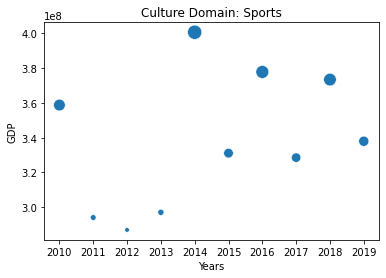

In [227]:
# plot one of the domains years vs gdp
plt.title("Culture Domain: Sports")
sn.scatterplot(data=dataset,x="Years", y="GDP", size="GDP", legend=False, sizes=(20,200))

In [228]:
dataset = reshaped_df
dataset = dataset.loc[dataset['Domain'] =='Non-Culture Products']
dataset = dataset.drop(['Domain'],axis=1)
dataset=dataset.reset_index(drop=True)
dataset

,Years,GDP
0,2010,431182516
1,2011,482681467
2,2012,515883737
3,2013,527941174
4,2014,624091470
5,2015,573398860
6,2016,633584548
7,2017,606889020
8,2018,662082561
9,2019,657413117


Text(0.5, 1.0, 'Culture Domain: Non-Culture Products')

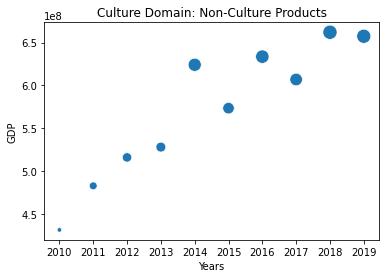

In [229]:
# locate 'Written and Published Works' and plot years vs gdp
sn.scatterplot(data=dataset,x="Years", y="GDP", size="GDP", legend=False, sizes=(20,200))
plt.title("Culture Domain: Non-Culture Products")

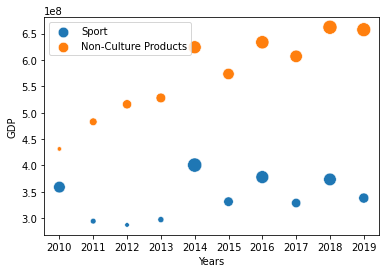

In [230]:
#append the two table in one 
heritage_df = reshaped_df.loc[reshaped_df.Domain == "Sport"]
live_df = reshaped_df.loc[reshaped_df.Domain == "Non-Culture Products"]
sn.scatterplot(data=heritage_df,x="Years", y="GDP", size="GDP", legend=False, sizes=(20,200))
sn.scatterplot(data=live_df,x="Years", y="GDP", size="GDP", legend=False, sizes=(20,200))
plt.legend(labels=["Sport", "Non-Culture Products"])

## This is the SQL SECTION

In [231]:
# To save the second DataFrame to a SQL table, we only have to specify the name of 
# the table and the engine in the to_sql() method.
reshaped_df.to_sql(name='culture_year_gdp', index=False, con=engine)